In [426]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

In [427]:
alpha = 0.02

In [428]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [429]:
import pickle


file_path = f"/content/drive/MyDrive/data_100k_alpha_folds/x_train_alpha({0.01}){1}.pkl"

with open(file_path, 'rb') as file:
    X_train = pickle.load(file)

X_train

,age1,age2,age3,age4,age5,age6,gender1,gender2,job1,job2,...,job18,job19,job20,job21,PR,CD,CC,CB,LC,AND
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.137604,0.163380,0.652632,0.000088,0.000089,0.868979
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.047768,0.028169,0.570377,0.000000,0.000000,0.801968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.098709,0.104225,0.639835,0.000041,0.000041,0.866993
940,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
941,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.057652,0.042254,0.595010,0.000000,0.000000,0.868531


In [430]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)



In [431]:
test_size=0.2
latent_dim=10
epochs=100
batch_size=64

In [432]:
X_train_val, X_test_val = train_test_split(X_train, test_size=test_size, random_state=42)


In [433]:
# Set all seeds for reproducibility
import random
import os
import tensorflow as tf

seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 35)             │         4,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,573 (119.43 KB)

 Trainable params: 30,573 (119.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 1.0290 - val_loss: 0.9425
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9907 - val_loss: 0.8955
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9276 - val_loss: 0.8319
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8522 - val_loss: 0.7705
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7826 - val_loss: 0.7163
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7245 - val_loss: 0.6668
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6747 - val_loss: 0.6240
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6328 - val_loss: 0.5883
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5955 - val_loss: 0.5528
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5565 - val_loss: 0.5201
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5207 - val_loss: 0.4900
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - los

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,274 (59.66 KB)

 Trainable params: 15,274 (59.66 KB)

 Non-trainable params: 0 (0.00 B)

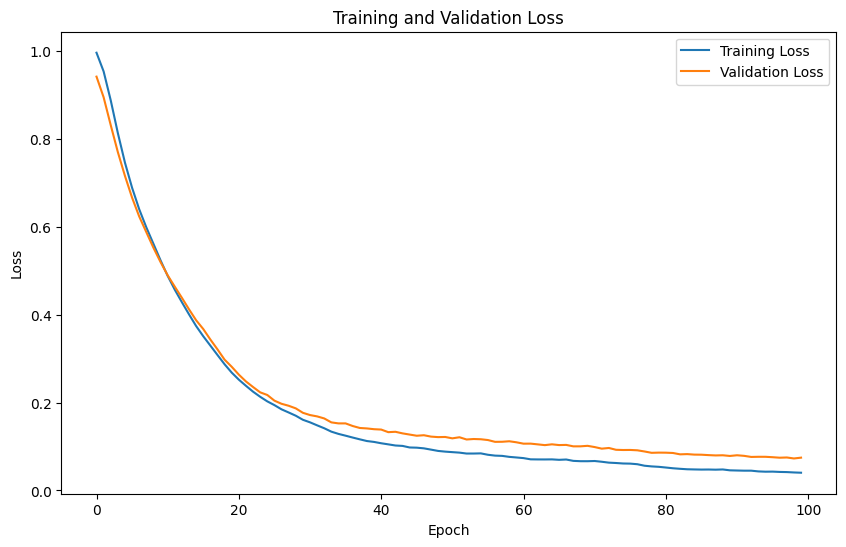

In [434]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.activations import relu, tanh
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

input_dim = X_train.shape[1]

#Encoder
input_layer = Input(shape=(input_dim,))
encoded4 = Dense(128, activation=relu)(input_layer)
encoded3 = Dense(64, activation=relu)(encoded4)
encoded2 = Dense(32, activation=relu)(encoded3)
#encoded1 = Dense(64, activation=LeakyReLU(0.3))(encoded2)
latent_representation = Dense(latent_dim, activation=tanh)(encoded2) # لایه گلوگاه

#decoder
decoded1 = Dense(32, activation=relu)(latent_representation)
decoded2 = Dense(64, activation=relu)(decoded1)
decoded3 = Dense(128, activation=relu)(decoded2)
#decoded4 = Dense(512, activation=LeakyReLU(0.3))(decoded3)

output_layer = Dense(input_dim, activation='linear')(decoded3)

autoencoder = Model(input_layer, output_layer)
autoencoder.summary()


autoencoder.compile(loss='mse', optimizer='adam')


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = autoencoder.fit(
        X_train_val, X_train_val,
        epochs=epochs,
        batch_size=batch_size,
        shuffle=False,
        validation_data=(X_test_val, X_test_val),
        callbacks=[early_stopping] # Add the callback here
)

    #  encoder to extract the embedding
encoder_model = Model(input_layer, latent_representation)
encoder_model.summary()
    #loss plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [435]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.layers import Input, Dense, LeakyReLU
# from tensorflow.keras.activations import relu, tanh
# from tensorflow.keras.models import Model
# from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping
# from tensorflow.keras.regularizers import l1_l2
# reg = l1_l2(l1=1e-5, l2=1e-4) # Tune these values


# input_dim = X_train.shape[1]

# # encoder
# input_layer = Input(shape=(input_dim,))
# encoded4 = Dense(128, activation=relu, kernel_regularizer=reg)(input_layer)
# encoded3 = Dense(64, activation=relu, kernel_regularizer=reg)(encoded4)
# encoded2 = Dense(32, activation=relu, kernel_regularizer=reg)(encoded3)
# #encoded1 = Dense(64, activation=LeakyReLU(0.3))(encoded2)
# latent_representation = Dense(latent_dim, activation=relu)(encoded2) # Change from tanh
# # decoder
# decoded1 = Dense(32, activation=relu, kernel_regularizer=reg)(latent_representation)
# decoded2 = Dense(64, activation=relu, kernel_regularizer=reg)(decoded1)
# decoded3 = Dense(128, activation=relu, kernel_regularizer=reg)(decoded2)
# #decoded4 = Dense(512, activation=LeakyReLU(0.3))(decoded3)

# output_layer = Dense(input_dim, activation='sigmoid')(decoded3)

# # ---create  Autoencoder model ---
# autoencoder = Model(input_layer, output_layer)
# autoencoder.summary()

# optimizer = Adam(learning_rate=0.01)
# autoencoder.compile(loss='mse', optimizer='adam')

# # Define EarlyStopping callback
# # Monitor 'val_loss' (validation loss)
# # 'patience' is the number of epochs with no improvement after which training will be stopped.
# # 'restore_best_weights' restores model weights from the epoch with the best value of the monitored quantity.
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# history = autoencoder.fit(
#         X_train_val, X_train_val,
#         epochs=epochs,
#         batch_size=batch_size,
#         shuffle=True,
#         validation_data=(X_test_val, X_test_val), # ارزیابی عملکرد بر روی داده‌های آزمایشی
#         callbacks=[early_stopping] # Add the callback here
# )


# encoder_model = Model(input_layer, latent_representation)
# encoder_model.summary()
#     # 7. (اختیاری) نمایش نمودار Loss
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Save the plot to Google Drive
# plot_path = '/content/drive/MyDrive/training_validation_loss_plot.png'
# plt.savefig(plot_path)
# print(f"Plot saved to: {plot_path}")

In [436]:
# #to check if there is overfitting or no

# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# plot_path = '/content/drive/MyDrive/training_validation_loss_plot.png'
# plt.savefig(plot_path)

In [437]:
encoded_features_train = encoder_model.predict(X_train)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [438]:
encoded_features_train

array([[ 0.9472401 , -0.8609175 , -0.2727896 , ..., -0.9245855 ,
        -0.8887837 , -0.9232875 ],
       [-0.7730579 , -0.3532975 ,  0.40287358, ..., -0.8795563 ,
         0.04978922,  0.7825428 ],
       [ 0.94576067,  0.23945102, -0.94535273, ..., -0.81085634,
         0.30190217, -0.9105312 ],
       ...,
       [-0.39705107,  0.83042264,  0.88087314, ..., -0.9190208 ,
         0.08359945,  0.2284005 ],
       [ 0.76250273, -0.83237666,  0.00419164, ..., -0.8565466 ,
         0.9682145 , -0.2274786 ],
       [-0.53281134,  0.63189924, -0.08540985, ..., -0.9275031 ,
         0.1372321 , -0.25289595]], dtype=float32)

In [439]:
# # Reconstruct X_train
# X_train_reconstructed = autoencoder.predict(X_train)

# # Compute reconstruction error (MSE per user)
# reconstruction_errors = np.mean(np.square(X_train - X_train_reconstructed), axis=1)

# # Plot histogram of errors
# plt.figure(figsize=(10, 6))
# plt.hist(reconstruction_errors, bins=50, color='skyblue', edgecolor='black')
# plt.title("Distribution of Reconstruction Errors")
# plt.xlabel("Reconstruction Error (MSE)")
# plt.ylabel("Number of Users")
# plt.grid(True)
# plt.show()

# plot_path = '/content/drive/MyDrive/Distribution of Reconstruction Errors_plot.png'
# plt.savefig(plot_path)

Training with Adam optimizer...
Training with SGD optimizer...
Training with RMSprop optimizer...
Training with Adadelta optimizer...
Training with Adagrad optimizer...
Training with Nadam optimizer...
Training with Ftrl optimizer...


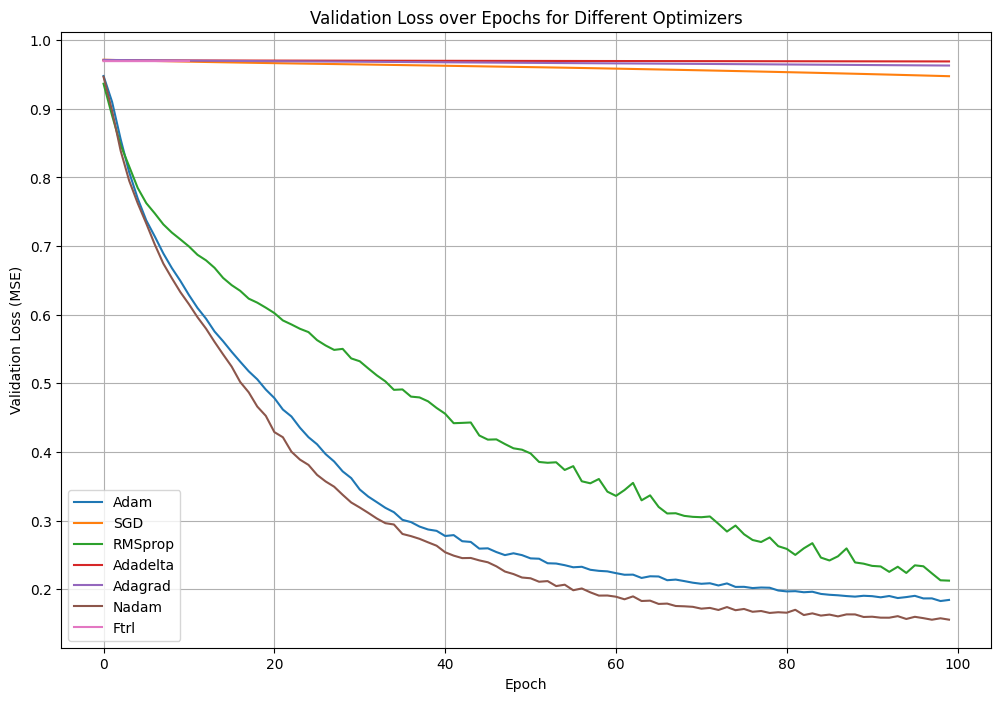

<Figure size 640x480 with 0 Axes>

In [479]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Nadam, Ftrl


optimizers = {
    'Adam': Adam(),
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adadelta': Adadelta(),
    'Adagrad': Adagrad(),
    'Nadam': Nadam(),
    'Ftrl': Ftrl()
}




histories = {}

input_dim = X_train.shape[1]
latent_dim = 4  # Using the latent_dim from earlier

for opt_name, optimizer in optimizers.items():
    print(f"Training with {opt_name} optimizer...")

    # Rebuild the autoencoder model for each optimizer
    input_layer = Input(shape=(input_dim,))
    encoded4 = Dense(128, activation='relu')(input_layer)
    encoded3 = Dense(64, activation='relu')(encoded4)
    encoded2 = Dense(32, activation='relu')(encoded3)
    latent_representation = Dense(latent_dim, activation='tanh')(encoded2)

    decoded1 = Dense(32, activation='relu')(latent_representation)
    decoded2 = Dense(64, activation='relu')(decoded1)
    decoded3 = Dense(128, activation='relu')(decoded2)
    output_layer = Dense(input_dim, activation='linear')(decoded3)

    autoencoder = Model(input_layer, output_layer)

    autoencoder.compile(loss='mse', optimizer=optimizer)

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = autoencoder.fit(
        X_train_val, X_train_val,
        epochs=100,
        batch_size=batch_size,
        shuffle=False,
        validation_data=(X_test_val, X_test_val),
        callbacks=[early_stopping],
        verbose=0 # Suppress training output for clarity
    )
    histories[opt_name] = history.history['val_loss']

# Plotting the validation loss for each optimizer
plt.figure(figsize=(12, 8))
for opt_name, val_loss in histories.items():
    plt.plot(val_loss, label=opt_name)

plt.title('Validation Loss over Epochs for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

plot_path = '/content/drive/MyDrive/Validation_Loss_over_Epochs_for_Different_Optimizers_plot.png'
plt.savefig(plot_path)

<h2> fine tuning the laten_dim hyperparameter </h2>

In [480]:
reconstruction_errors = []
latent_dims = [2, 4,6,8,10,12,14,16]  # Test values smaller than input_dim (35)

for latent_dim in latent_dims:
      input_layer = Input(shape=(input_dim,))
      encoded4 = Dense(128, activation=LeakyReLU(0.3))(input_layer)
      encoded3 = Dense(64, activation=LeakyReLU(0.3))(encoded4)
      encoded2 = Dense(32, activation=LeakyReLU(0.3))(encoded3)
      latent_representation = Dense(latent_dim, activation=LeakyReLU(0.3))(encoded2) # لایه گلوگاه


      decoded1 = Dense(32, activation=LeakyReLU(0.3))(latent_representation)
      decoded2 = Dense(64, activation=LeakyReLU(0.3))(decoded1)
      decoded3 = Dense(128, activation=LeakyReLU(0.3))(decoded2)
      output_layer = Dense(input_dim, activation='linear')(decoded3)

      autoencoder = Model(input_layer, output_layer)
      autoencoder.compile(loss='mse', optimizer='adam')


      early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


      history = autoencoder.fit(
              X_train_val, X_train_val,
              epochs=epochs,
              batch_size=batch_size,
              shuffle=True,
              validation_data=(X_test_val, X_test_val), # ارزیابی عملکرد بر روی داده‌های آزمایشی
              callbacks=[early_stopping] # Add the callback here
      )


      reconstruction_errors.append(history.history['val_loss'][-1])

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.9602 - val_loss: 0.9144
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8811 - val_loss: 0.8502
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8188 - val_loss: 0.8169
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7920 - val_loss: 0.8062
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7760 - val_loss: 0.7948
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7602 - val_loss: 0.7836
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7452 - val_loss: 0.7755
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7340 - val_loss: 0.7713
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7261 - val_loss: 0.7671
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7201 - val_loss: 0.7637
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7142 - val_loss: 0.7589
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

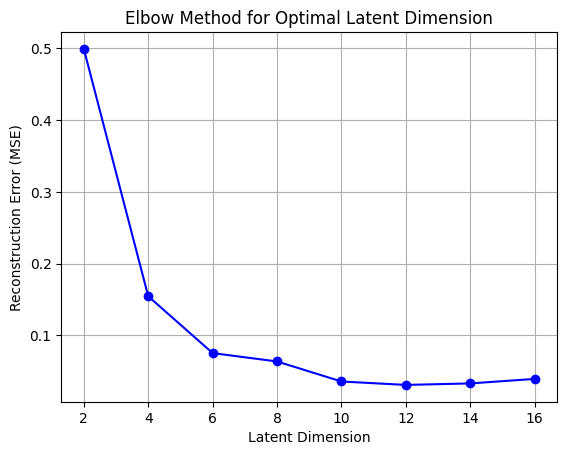

<Figure size 640x480 with 0 Axes>

In [487]:
plt.plot(latent_dims, reconstruction_errors, 'bo-')
plt.xlabel('Latent Dimension')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Elbow Method for Optimal Latent Dimension')
plt.grid()
plt.show()

plot_path = '/content/drive/MyDrive/Elbow_Method_for_Optimal_Latent_Dimension.png'
plt.savefig(plot_path)

<h2> detect each user's cluster </h2>

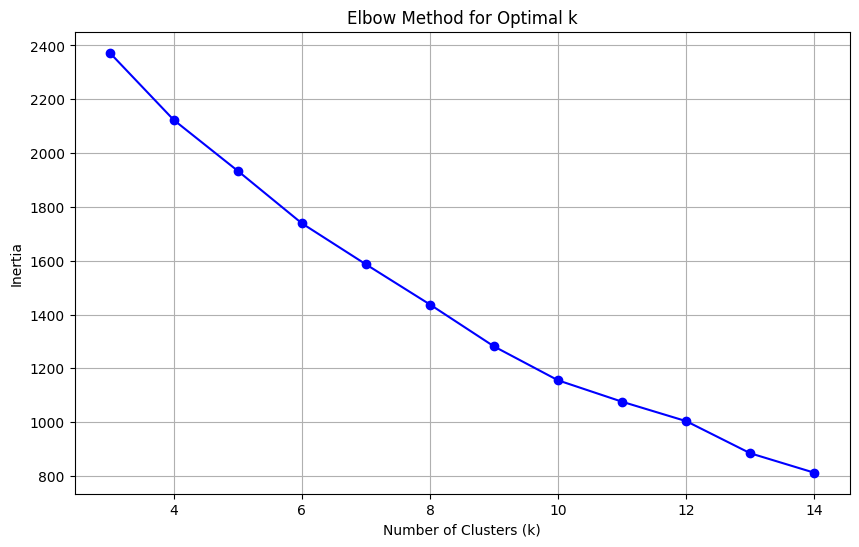

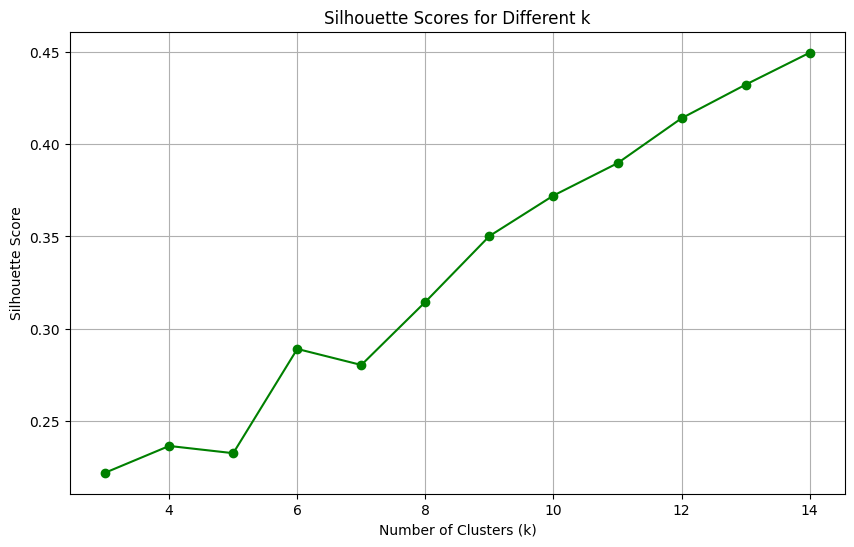

<Figure size 640x480 with 0 Axes>

In [443]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate Inertia (for Elbow method) and Silhouette Scores for different k
inertia = []
silhouette_scores = []
k_range = range(3, 15) # Test k values from 3 to 14

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=seed, n_init=10)
    kmeans.fit(encoded_features_train)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(encoded_features_train, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid()
plt.show()

plot_path = '/content/drive/MyDrive/Silhouette_Scores_for_Different_k.png'
plt.savefig(plot_path)

In [444]:
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm #


In [445]:
scaler = StandardScaler()
encoded_features_train = scaler.fit_transform(encoded_features_train)

In [446]:
encoded_features_train

array([[ 1.0288272 , -1.3440523 , -0.47989774, ..., -0.5208703 ,
        -1.4955376 , -1.9003416 ],
       [-1.4178371 , -0.5963925 ,  0.604299  , ..., -0.41814938,
         0.04175512,  1.2611809 ],
       [ 1.026723  ,  0.2766508 , -1.55912   , ..., -0.26143062,
         0.454692  , -1.8766997 ],
       ...,
       [-0.883068  ,  1.147077  ,  1.3713167 , ..., -0.508176  ,
         0.09713303,  0.23415412],
       [ 0.7660876 , -1.3020153 , -0.03544231, ..., -0.36565948,
         1.5460479 , -0.6107553 ],
       [-1.0761507 ,  0.8546772 , -0.17922053, ..., -0.52752596,
         0.18497819, -0.6578629 ]], dtype=float32)


--- Visualizing Silhouette for optimal k = 6 ---
0.27481025


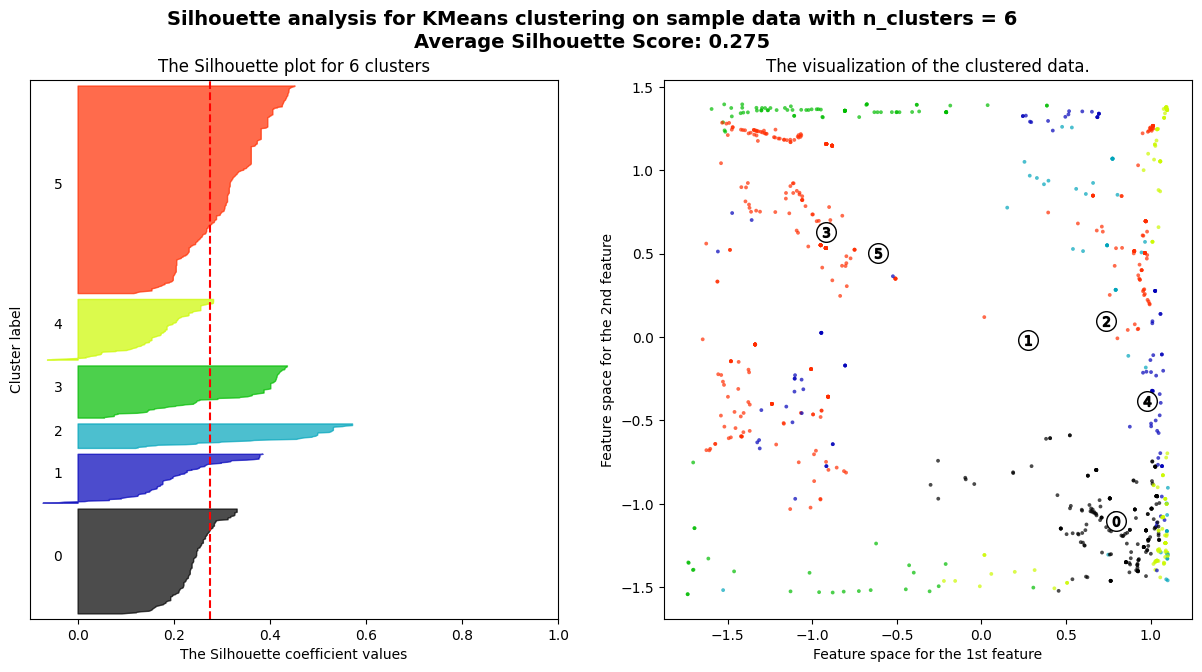

<Figure size 640x480 with 0 Axes>

In [447]:
optimal_k =6 # Replace with the k you found to be optimal from the plot

# --- Part 2: Visualizing Individual Silhouette Scores (Silhouette Plot) ---

print(f"\n--- Visualizing Silhouette for optimal k = {optimal_k} ---")

# Re-run K-means with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=seed, n_init=10)
cluster_labels_optimal = kmeans_optimal.fit_predict(encoded_features_train)
silhouette_avg_optimal = silhouette_score(encoded_features_train, cluster_labels_optimal)
sample_silhouette_values = silhouette_samples(encoded_features_train, cluster_labels_optimal)
print(silhouette_avg_optimal)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1]) # Silhouette scores range from -1 to +1, so we set a reasonable x-limit
ax1.set_ylim([0, len(encoded_features_train) + (optimal_k + 1) * 10]) # Space between clusters

y_lower = 10
for i in range(optimal_k):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_optimal == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples

ax1.set_title(f"The Silhouette plot for {optimal_k} clusters")
ax1.set_xlabel("The Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg_optimal, color="red", linestyle="--")
ax1.set_yticks([]) # Clear the yaxis labels / ticks

  # 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels_optimal.astype(float) / optimal_k)
ax2.scatter(encoded_features_train[:, 0], encoded_features_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors, edgecolor='k')

  # Labeling the clusters
centers = kmeans_optimal.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle((f"Silhouette analysis for KMeans clustering on sample data "
                f"with n_clusters = {optimal_k}\n"
                f"Average Silhouette Score: {silhouette_avg_optimal:.3f}"),
              fontsize=14, fontweight='bold')
plt.show()

plot_path = '/content/drive/MyDrive/Silhouette_analysis_for_KMeans_clustering_on_sample_data.png'
plt.savefig(plot_path)

<h2> recommmend Top N items in each cluster dor users in that cluster </h2>

In [448]:
import pandas as pd
n = encoded_features_train.shape[1]
columns = [f'f{i+1}' for i in range(n)]
encoded_features_train_df = pd.DataFrame(encoded_features_train,columns=columns)


In [449]:
# from hdbscan import HDBSCAN

# # Instantiate HDBSCAN with initial parameters
# hdbscan = HDBSCAN(min_cluster_size=5, min_samples=1, prediction_data=True)

# # Fit the model and get cluster labels
# hdbscan_labels = hdbscan.fit_predict(encoded_features_train)

In [450]:
# np.sum(hdbscan_labels == -1)

In [451]:
# len(hdbscan_labels)

In [452]:
# noise_cluster_id = max(hdbscan_labels) + 1
# hdbscan_labels = np.where(hdbscan_labels == -1, noise_cluster_id, hdbscan_labels)

In [453]:
# from sklearn.cluster import KMeans

# # Separate noise and clustered points
# noise_mask = hdbscan_labels == noise_cluster_id
# noise_points = encoded_features_train[noise_mask]

# # Apply KMeans to noise points
# kmeans = KMeans(n_clusters=3, random_state=42)
# noise_labels = kmeans.fit_predict(noise_points)

# # Merge labels
# final_labels = hdbscan_labels.copy()
# final_labels[noise_mask] = max(hdbscan_labels) + noise_labels-1


In [454]:
# np.unique(final_labels)

In [455]:
# kmeans_optimal = KMeans(n_clusters=7, random_state=seed, n_init=10)
# cluster_labels_optimal = kmeans_optimal.fit_predict(encoded_features_train)

In [456]:
encoded_features_train_df['cluster'] = cluster_labels_optimal

In [457]:
encoded_features_train_df.head()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,cluster
0,1.028827,-1.344052,-0.479898,-1.802761,-1.696260,-1.433123,0.871768,-0.520870,-1.495538,-1.900342,4
1,-1.417837,-0.596393,0.604299,0.324116,1.048895,-0.164107,0.712250,-0.418149,0.041755,1.261181,5
2,1.026723,0.276651,-1.559120,-1.157196,1.294327,0.208086,0.394400,-0.261431,0.454692,-1.876700,1
3,1.074096,-1.080038,-0.270205,-1.707390,-1.549122,-1.819430,0.688322,-0.555289,-1.522493,-1.772299,4
4,-0.952036,-0.974303,1.077168,0.660530,0.376042,0.535747,1.186360,-0.305354,-0.261255,0.691891,5


In [458]:
encoded_features_train_df = encoded_features_train_df.reset_index()
encoded_features_train_df['index'] = encoded_features_train_df['index'] + 1

In [459]:
encoded_features_train_df = encoded_features_train_df.rename(columns={'index':'UID'})

In [460]:
encoded_features_train_df.head()
#till now the cluster for each is associated

,UID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,cluster
0,1,1.028827,-1.344052,-0.479898,-1.802761,-1.696260,-1.433123,0.871768,-0.520870,-1.495538,-1.900342,4
1,2,-1.417837,-0.596393,0.604299,0.324116,1.048895,-0.164107,0.712250,-0.418149,0.041755,1.261181,5
2,3,1.026723,0.276651,-1.559120,-1.157196,1.294327,0.208086,0.394400,-0.261431,0.454692,-1.876700,1
3,4,1.074096,-1.080038,-0.270205,-1.707390,-1.549122,-1.819430,0.688322,-0.555289,-1.522493,-1.772299,4
4,5,-0.952036,-0.974303,1.077168,0.660530,0.376042,0.535747,1.186360,-0.305354,-0.261255,0.691891,5


In [461]:
import pandas as pd
ratings = pd.read_csv('/content/drive/MyDrive/ml-100k/u1.base',sep='\s+', header=None)
ratings.columns = ['UID', 'MID', 'rating', 'timestamp']



<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1927087898.py:2: SyntaxWarning: invalid escape sequence '\s'
  ratings = pd.read_csv('/content/drive/MyDrive/ml-100k/u1.base',sep='\s+', header=None)


In [462]:
ratings.drop('timestamp',axis=1,inplace=True)

In [463]:
ratings_clustered = pd.merge(ratings, encoded_features_train_df[['UID', 'cluster']], on='UID')


In [464]:
ratings_clustered.head()

,UID,MID,rating,cluster
0,1,1,5,4
1,1,2,3,4
2,1,3,4,4
3,1,4,3,4
4,1,5,3,4


In [465]:
item_ratings = ratings_clustered.groupby(['MID','cluster'])['rating'].agg(['mean', 'count'])
item_ratings


mean  count
MID  cluster                 
1    0        3.961538     78
     1        3.600000     35
     2        3.947368     19
     3        4.068182     44
     4        3.891892     37
...                ...    ...
1678 5        1.000000      1
1679 5        3.000000      1
1680 5        2.000000      1
1681 1        3.000000      1
1682 0        3.000000      1

[7646 rows x 2 columns]

In [466]:
from sklearn.metrics.pairwise import cosine_similarity

# Create item-user rating matrix
item_user_matrix = ratings_clustered.pivot_table(index='MID', columns='UID', values='rating').fillna(0)

# Compute cosine similarity between items
item_similarity_matrix = pd.DataFrame(
    cosine_similarity(item_user_matrix),
    index=item_user_matrix.index,
    columns=item_user_matrix.index
)


In [467]:
item_similarity_matrix

MID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
MID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.357646,0.309390,0.373556,0.233597,0.088069,0.542065,0.410063,0.421738,0.235267,...,0.038276,0.0,0.000000,0.000000,0.038276,0.0,0.0,0.0,0.051035,0.051035
2,0.357646,1.000000,0.221600,0.419180,0.282711,0.084006,0.334544,0.285908,0.192594,0.119709,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.087781,0.087781
3,0.309390,0.221600,1.000000,0.262853,0.144386,0.078189,0.307612,0.186519,0.288698,0.147544,...,0.000000,0.0,0.000000,0.000000,0.035556,0.0,0.0,0.0,0.000000,0.106668
4,0.373556,0.419180,0.262853,1.000000,0.273416,0.099500,0.402405,0.399622,0.339125,0.184911,...,0.000000,0.0,0.104416,0.104416,0.041766,0.0,0.0,0.0,0.062650,0.083533
5,0.233597,0.282711,0.144386,0.273416,1.000000,0.017107,0.275840,0.184932,0.206313,0.039897,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.105021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
1679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
1680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000


In [488]:
def calculate_pred_rating(row, item_ratings, ratings_clustered, item_similarity_matrix, top_n=4, min_count=5, smoothing=5):
    mid = row['MID']
    cluster = row['cluster']

    # 1. Direct cluster rating with weighted mean
    if (mid, cluster) in item_ratings.index:
        stats = item_ratings.loc[(mid, cluster)]
        count = stats['count']
        mean = stats['mean']

        #weighted_mean = (mean * count + smoothing * ratings_clustered[ratings_clustered['cluster'] == cluster]['rating'].mean()) / (count + smoothing)

        if count >=5:
          return mean  # confident enough
        #else:
            #return weighted_mean  # softened version


    # Handle case where item is not in the similarity matrix (not in training data)
    if mid not in item_similarity_matrix.index:
        # 3. Fallback: Cluster-wide average
        cluster_avg = ratings_clustered[ratings_clustered['cluster'] == cluster]['rating'].mean()
        return cluster_avg if not np.isnan(cluster_avg) else np.nan


    # 2. Fallback: Similar items rated in the cluster
    similar_items = item_similarity_matrix[mid].sort_values(ascending=False).drop(mid).head(top_n).index
    cluster_ratings = ratings_clustered[
        (ratings_clustered['cluster'] == cluster) &
        (ratings_clustered['MID'].isin(similar_items))
    ]

    if not cluster_ratings.empty:
        return cluster_ratings['rating'].mean()

    # 3. Fallback: Cluster-wide average
    cluster_avg = ratings_clustered[ratings_clustered['cluster'] == cluster]['rating'].mean()
    return cluster_avg if not np.isnan(cluster_avg) else np.nan

In [489]:
test_ratings = pd.read_csv('/content/drive/MyDrive/ml-100k/u1.test',sep='\s+', header=None)
test_ratings.columns = ['UID', 'MID', 'rating', 'timestamp']
test_ratings_clustered = pd.merge(test_ratings, encoded_features_train_df[['UID', 'cluster']], on='UID')


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-161081249.py:1: SyntaxWarning: invalid escape sequence '\s'
  test_ratings = pd.read_csv('/content/drive/MyDrive/ml-100k/u1.test',sep='\s+', header=None)


In [490]:
test_ratings_clustered['pred_rating'] = test_ratings_clustered.apply(
     lambda row: calculate_pred_rating(row, item_ratings, ratings_clustered, item_similarity_matrix),
     axis=1
 )

# # Drop rows where pred_rating is still NaN (should only happen if a cluster has no ratings)
# ratings_clustered.dropna(subset=['pred_rating'], inplace=True)

In [471]:
test_ratings_clustered.dropna(subset=['pred_rating'], inplace=True)

In [472]:
test_ratings_clustered.tail(20)

,UID,MID,rating,timestamp,cluster,pred_rating
19980,455,629,3,879111371,0,3.150000
19981,455,755,3,879112189,0,3.187500
19982,456,175,3,881372946,4,3.190476
19983,456,294,1,881375667,4,3.270833
19984,456,715,3,881373697,4,4.200000
19985,456,943,4,881372946,4,3.500000
19986,457,182,4,882396659,0,3.631579
19987,457,192,5,882395018,0,3.826087
19988,457,366,4,882549287,0,2.666667
19989,457,443,4,882396989,0,3.833333


In [473]:
r = pd.merge(test_ratings_clustered,item_ratings,on=['MID','cluster'] )
len(r)

19587

In [474]:
20000-19392

608

<h2> evaluate the model with RMSE metric </h2>

In [491]:

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_ratings_clustered['rating'], test_ratings_clustered['pred_rating']))
print(f"RMSE: {rmse}")


RMSE: 1.0660794845456196


precision with different view

In [476]:
import numpy as np
from sklearn.metrics import mean_squared_error

def precision_recall_ghrs(ratings_df, threshold=3.8):
    """
    Computes average Precision and Recall across users using GHRS-style logic.
    - Relevant items: actual rating >= threshold
    - Selected items: predicted rating >= threshold
    """

    num_users = ratings_df['UID'].nunique()
    precisions = []
    recalls = []

    for user_id in ratings_df['UID'].unique():
        user_data = ratings_df[ratings_df['UID'] == user_id]

        relevant_items = user_data[user_data['rating'] >=4.0]['MID'].tolist()
        selected_items = user_data[user_data['pred_rating'] >= threshold]['MID'].tolist()

        true_positives = list(set(relevant_items) & set(selected_items))

        precision = len(true_positives) / len(selected_items) if len(selected_items) > 0 else 0
        recall = len(true_positives) / len(relevant_items) if len(relevant_items) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)

    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)

    return avg_precision, avg_recall

In [477]:
precision_recall_ghrs(test_ratings_clustered)

(np.float64(0.7017785200964677), np.float64(0.44778224776877396))

<h2> evaluate the model with precison </h2>
Of the top K items you recommend, how many were relevant

In [ ]:
def compute_precision_at_k(test_df, user_cluster_map, cluster_item_ratings, k=5):
    precision_scores = []
    recall_scores = []

    # Step 1: Build top-K recommended items per cluster
    cluster_top_items = {}
    for (mid, cluster), stats in cluster_item_ratings.items():
        cluster_top_items.setdefault(cluster, []).append((mid, stats['mean']))

    # Sort items in each cluster by average rating
    for cluster in cluster_top_items:
        cluster_top_items[cluster] = sorted(
            cluster_top_items[cluster],
            key=lambda x: x[1],
            reverse=True
        )

    # Step 2: Compute Precision@K and Recall@K per user
    for uid in test_df['UID'].unique():
        cluster = user_cluster_map.get(uid)
        if cluster is None or cluster not in cluster_top_items:
            continue

        # Get top-K recommended items for user's cluster
        recommended_items = [mid for mid, _ in cluster_top_items[cluster][:k]]

        # Get actual test items for this user
        actual_items = test_df[(test_df['UID'] == uid)]['MID'].tolist()
        if actual_items is None :
          continue

        # Calculate Precision@K
        hits = len(set(recommended_items) & set(actual_items))
        precision = hits / k
        precision_scores.append(precision)

        # Calculate Recall@K
        recall = hits / len(actual_items) if len(actual_items) > 0 else 0
        recall_scores.append(recall)


    avg_precision = np.mean(precision_scores) if precision_scores else None
    avg_recall = np.mean(recall_scores) if recall_scores else None

    return avg_precision, avg_recall

In [ ]:
# Assuming you have: encoded_features_train_df with ['UID', 'cluster']
user_cluster_map = dict(zip(encoded_features_train_df['UID'], encoded_features_train_df['cluster']))


In [ ]:
cluster_item_ratings = {
    (row['MID'], row['cluster']): {'mean': row['mean'], 'count': row['count']}
    for _, row in item_ratings.reset_index().iterrows()
}


In [ ]:
precision_at_5, recall_at_5 = compute_precision_at_k(test_ratings, user_cluster_map, cluster_item_ratings, k=10)
print(f"Precision@10: {precision_at_5:.4f}")

In [ ]:
len(item_ratings)

In [ ]:
# prompt: iterate over the dataframe rows

# Function to recommend items within each cluster
def recommend_items_in_cluster(df, cluster_id, top_n=10):
    # Filter data for the specified cluster
    cluster_data = df[df['cluster'] == cluster_id]

    # Group by movie ID and calculate the average rating and count ratings
    item_ratings = cluster_data.groupby('MID')['rating'].agg(['mean', 'count']).reset_index()

    # Filter out items with a low number of ratings to ensure reliability
    min_ratings = 5 # You can adjust this threshold
    item_ratings_filtered = item_ratings[item_ratings['count'] >= min_ratings]

    # Sort by average rating in descending order
    top_items = item_ratings_filtered.sort_values(by='mean', ascending=False)

    # Return the top N items
    return top_items.head(top_n)

# Iterate over each cluster and recommend items
for cluster_id in range(optimal_k):
    print(f"\nRecommendations for Cluster {cluster_id}:")
    recommended_items = recommend_items_in_cluster(ratings_clustered, cluster_id, top_n=5) # Recommend top 5 items per cluster
    if recommended_items.empty:
        print("No reliable recommendations available for this cluster.")
    else:
        print(recommended_items)

# Example of getting recommendations for a specific user's cluster
user_id_to_recommend = 123 # Replace with an actual user ID from your data
user_cluster = encoded_features_train_df[encoded_features_train_df['UID'] == user_id_to_recommend]['cluster'].iloc[0]
print(f"\nRecommendations for User {user_id_to_recommend} (in Cluster {user_cluster}):")
user_recommendations = recommend_items_in_cluster(ratings_clustered, user_cluster, top_n=10) # Recommend top 10 for the user
if user_recommendations.empty:
    print("No reliable recommendations available for this user's cluster.")
else:
  user_recommendations

<h2> tune the hyperparameters </h2>

In [ ]:
# def objective(trial):
#       latent_dim = trial.suggest_int("latent_dim", 4, 12)
#       learning_rate = trial.suggest_loguniform("lr", 1e-4, 1e-2)
#       optimal_k = trial.suggest_int("optimal_k", 6, 14)


#       test_size=0.2
#       epochs=50
#       batch_size=32

#       X_train_val, X_test_val = train_test_split(X_train, test_size=test_size, random_state=42)


#       seed = 42
#       np.random.seed(seed)
#       random.seed(seed)
#       tf.random.set_seed(seed)
#       os.environ['PYTHONHASHSEED'] = str(seed)



#       input_dim = X_train.shape[1]

#           # --- (Encoder) ---
#       input_layer = Input(shape=(input_dim,))
#       encoded4 = Dense(128, activation=relu)(input_layer)
#       encoded3 = Dense(64, activation=relu)(encoded4)
#       encoded2 = Dense(32, activation=relu)(encoded3)
#       #encoded1 = Dense(64, activation=LeakyReLU(0.3))(encoded2)
#       latent_representation = Dense(latent_dim, activation=tanh)(encoded2) # لایه گلوگاه

#           #decoder
#       decoded1 = Dense(32, activation=relu)(latent_representation)
#       decoded2 = Dense(64, activation=relu)(decoded1)
#       decoded3 = Dense(128, activation=relu)(decoded2)
#       #decoded4 = Dense(512, activation=LeakyReLU(0.3))(decoded3)

#       output_layer = Dense(input_dim, activation='linear')(decoded3)

#           # ---create  Autoencoder model ---
#       autoencoder = Model(input_layer, output_layer)
#       autoencoder.summary()

#       # Use the learning_rate from the trial
#       optimizer = Adam(learning_rate=learning_rate)
#       autoencoder.compile(loss='mse', optimizer=optimizer)

#       # Define EarlyStopping callback
#       # Monitor 'val_loss' (validation loss)
#       # 'patience' is the number of epochs with no improvement after which training will be stopped.
#       # 'restore_best_weights' restores model weights from the epoch with the best value of the monitored quantity.
#       early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


#       history = autoencoder.fit(
#               X_train_val, X_train_val,
#               epochs=epochs,
#               batch_size=batch_size,
#               shuffle=False,
#               validation_data=(X_test_val, X_test_val), # ارزیابی عملکرد بر روی داده‌های آزمایشی
#               callbacks=[early_stopping] # Add the callback here
#       )

#           # 6. ساخت مدل Encoder برای استخراج ویژگی‌ها
#       encoder_model = Model(input_layer, latent_representation) # این مدل فقط بخش Encoder را شامل می‌شود
#       encoder_model.summary()


#       X_train_encoded = encoder_model.predict(X_train)

#       """<h2> create the graph features for test_users based on the graph features of N nearest train users features </h2>"""




#       # --- Part 2: Visualizing Individual Silhouette Scores (Silhouette Plot) ---


#       # Re-run K-means with the optimal k
#       kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=seed, n_init=10)
#       cluster_labels_optimal = kmeans_optimal.fit_predict(X_train_encoded)
#       silhouette_avg_optimal = silhouette_score(X_train_encoded, cluster_labels_optimal)
#       print(f"the silhoutee :{silhouette_avg_optimal} for k={optimal_k}")

#       num_of_features = len(X_train_encoded[0])
#       encoded_features_train_df = pd.DataFrame(X_train_encoded,columns=[f'f{i+1}' for i in range(num_of_features)])

#       # Add UID column to encoded_features_train_df
#       encoded_features_train_df['UID'] = encoded_features_train_df.index + 1

#       # Assign cluster labels to train_users DataFrame
#       encoded_features_train_df['cluster'] = cluster_labels_optimal

#       ratings_clustered = pd.merge(ratings, encoded_features_train_df[['UID', 'cluster']], on='UID')

#       item_ratings = ratings_clustered.groupby(['MID','cluster'])['rating'].agg(['mean', 'count'])


#       # Create item-user rating matrix
#       item_user_matrix = ratings_clustered.pivot_table(index='MID', columns='UID', values='rating').fillna(0)

#       # Compute cosine similarity between items
#       item_similarity_matrix = pd.DataFrame(
#           cosine_similarity(item_user_matrix),
#           index=item_user_matrix.index,
#           columns=item_user_matrix.index
#       )
#       def calculate_pred_rating(row, item_ratings, ratings_clustered, item_similarity_matrix, top_n=4, min_count=5, smoothing=5):
#           mid = row['MID']
#           cluster = row['cluster']

#           # 1. Direct cluster rating with weighted mean
#           if (mid, cluster) in item_ratings.index:
#               stats = item_ratings.loc[(mid, cluster)]
#               count = stats['count']
#               mean = stats['mean']

#               # Apply smoothing to reduce impact of low-count items
#               weighted_mean = (mean * count + smoothing * ratings_clustered[ratings_clustered['cluster'] == cluster]['rating'].mean()) / (count + smoothing)

#               if count >=7:
#                   return mean  # confident enough
#               else:
#                   return weighted_mean  # softened version

#           # 2. Fallback: Similar items rated in the cluster
#           similar_items = item_similarity_matrix[mid].sort_values(ascending=False).drop(mid).head(top_n).index
#           cluster_ratings = ratings_clustered[
#               (ratings_clustered['cluster'] == cluster) &
#               (ratings_clustered['MID'].isin(similar_items))
#           ]

#           if not cluster_ratings.empty:
#               return cluster_ratings['rating'].mean()

#           # 3. Fallback: Cluster-wide average
#           cluster_avg = ratings_clustered[ratings_clustered['cluster'] == cluster]['rating'].mean()
#           return cluster_avg if not np.isnan(cluster_avg) else np.nan
#       ratings_clustered['pred_rating'] = ratings_clustered.apply(
#           lambda row: calculate_pred_rating(row, item_ratings, ratings_clustered,item_similarity_matrix),
#           axis=1
#       )

#       # # Drop rows where pred_rating is still NaN (should only happen if a cluster has no ratings)
#       ratings_clustered.dropna(subset=['pred_rating'], inplace=True)


#       def precision_recall_ghrs(ratings_df, threshold=3.7):
#           """
#           Computes average Precision and Recall across users using GHRS-style logic.
#           - Relevant items: actual rating >= threshold
#           - Selected items: predicted rating >= threshold
#           """

#           num_users = ratings_df['UID'].nunique()
#           precisions = []
#           recalls = []

#           for user_id in ratings_df['UID'].unique():
#               user_data = ratings_df[ratings_df['UID'] == user_id]

#               relevant_items = user_data[user_data['rating'] >= 4]['MID'].tolist()
#               selected_items = user_data[user_data['pred_rating'] >= threshold]['MID'].tolist()

#               true_positives = list(set(relevant_items) & set(selected_items))

#               precision = len(true_positives) / len(selected_items) if len(selected_items) > 0 else 0
#               recall = len(true_positives) / len(relevant_items) if len(relevant_items) > 0 else 0

#               precisions.append(precision)
#               recalls.append(recall)

#           avg_precision = np.mean(precisions)
#           avg_recall = np.mean(recalls)

#           return avg_precision
#       return precision_recall_ghrs(ratings_clustered)

In [ ]:
# import optuna
# study = optuna.create_study(direction="maximize")
# study.optimize(lambda trial: objective(trial), n_trials=50)  # adjust n_trials as budget allows

In [ ]:
import pandas as pd
train_ratings = pd.read_csv('/content/drive/MyDrive/ml-100k/u1.base',sep='\s+', header=None)
train_ratings.columns = ['UID', 'MID', 'rating', 'timestamp']



<h1> the cold start like approach for recommending </h2>


In [482]:


import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

#cluster‐popularity scores
clusters = np.unique(encoded_features_train_df['cluster'])
pop_score = {}  # dict: cluster_id → { MID: avg_rating }

for c in clusters:
    cluster_uids = encoded_features_train_df[encoded_features_train_df['cluster'] == c]['UID'].values
    sub = ratings[(ratings['UID'].isin(cluster_uids))]
    if not sub.empty:
        grp = sub.groupby('MID')['rating'].mean()
        pop_score[c] = grp.to_dict()
    else:
        pop_score[c] = {}


uid_to_idx = {uid: i for i, uid in enumerate(encoded_features_train_df['UID'].values)}


alpha = 0.5
K = 10

all_ratings = pd.read_csv('/content/drive/MyDrive/ml-100k/u.data', sep='\t', header=None, encoding='latin-1', names=['UID', 'MID', 'rating', 'timestamp'])
all_items = all_ratings['MID'].unique()



In [483]:
def recommend_for(test_uid):
    # Get cluster of test user
    test_user_cluster_df = encoded_features_train_df[encoded_features_train_df['UID'] == test_uid]
    if test_user_cluster_df.empty:
        return [], {} # Return empty lists if test user not found

    c = test_user_cluster_df['cluster'].values[0]

    # Get test user embedding
    u_vec = test_user_cluster_df.drop(columns=['UID', 'cluster']).values

    # Get user embeddings in same cluster
    train_cluster_df = encoded_features_train_df[encoded_features_train_df['cluster'] == c]
    #train_cluster_df = train_cluster_df[~train_cluster_df['UID'] == test_uid]

    if train_cluster_df.empty:
         return [], {} # Return empty lists if no train users in cluster

    train_embs = train_cluster_df.drop(columns=['UID', 'cluster']).values
    sim = cosine_similarity(u_vec, train_embs).flatten()

    # Get train UIDs in cluster
    cluster_uids = train_cluster_df['UID'].values
    # Consider only ratings >= 4 for personalized score calculation
    sub = ratings[(ratings['UID'].isin(cluster_uids)) & (ratings['rating'] >= 4)]


    # Personalized score
    uid_to_local_idx = {uid: i for i, uid in enumerate(cluster_uids)}
    pers = {}
    for _, row in sub.iterrows():
        v_uid = row['UID']
        i_mid = row['MID']
        r = row['rating']
        if v_uid in uid_to_local_idx: # Check if UID is in the current cluster's mapping
             v_idx = uid_to_local_idx[v_uid]
             pers[i_mid] = pers.get(i_mid, 0.0) + sim[v_idx] * r


    # Final score
    scores = {}
    pop_c = pop_score.get(c, {})
    for i in all_items:
        # Only consider items that are in either the popularity or personalized scores (meaning they had a relevant rating)
        if i in pop_c or i in pers:
             p_sc = pop_c.get(i, 0.0)
             u_sc = pers.get(i, 0.0)
             scores[i] = alpha * p_sc + (1 - alpha) * u_sc


    # Filter out items that were not considered due to low ratings in the training data
    ranked = sorted([item for item in scores if scores[item] > 0], key=scores.get, reverse=True)

    # Get items the user has already rated in the training data
    user_rated_items = set(ratings[ratings['UID'] == test_uid]['MID'])

    # Filter out rated items from the recommendations
    unseen_ranked = [item for item in ranked if item not in user_rated_items]


    return unseen_ranked[:K], scores

In [484]:

# List of test UIDs
test_uids = encoded_features_train_df['UID'].values

# Initialize storage
recos = []         # list of top-K recommended MIDs per test user
score_dicts = []   # list of full score dictionaries per test user

# Loop over test users
for test_uid in test_uids:
    top_k_items, score_dict = recommend_for(test_uid)
    recos.append(top_k_items)
    score_dicts.append(score_dict)


In [ ]:
len(encoded_features_train_df)

In [485]:


def precision_at_k(recos, test_ratings, K=10):

    # Build ground truth: UID → set of relevant MIDs
    relevant_items = test_ratings[test_ratings['rating'] >= 4].groupby('UID')['MID'].apply(set).to_dict()

    precisions = []
    test_uids = encoded_features_train_df['UID'].values

    for uid, reco_list in zip(test_uids, recos):
        true_items = relevant_items.get(uid, set())
        if not true_items:
            continue  # skip users with no test ratings

        hits = sum(1 for mid in reco_list if mid in true_items)
        precisions.append(hits / K)

    return np.mean(precisions)

p_at_10 = precision_at_k(recos, test_ratings, K=10)
print(f"Precision@10: {p_at_10:.4f}")


Precision@10: 0.2289


In [486]:
def recall_at_k(recos, test_ratings, K=10):
    """
    recos: list of lists, each containing top-K recommended MIDs for a test UID
    test_ratings: DataFrame with columns ['UID', 'MID', 'rating']
    K: number of top items to consider
    """
    # Ground truth: UID → set of relevant MIDs (ratings ≥ 4)
    relevant_items = test_ratings[test_ratings['rating'] >= 4].groupby('UID')['MID'].apply(set).to_dict()

    recalls = []
    test_uids = encoded_features_train_df['UID'].values

    for uid, reco_list in zip(test_uids, recos):
        true_items = relevant_items.get(uid, set())
        if not true_items:
            continue  # skip users with no relevant items

        hits = sum(1 for mid in reco_list if mid in true_items)
        # Avoid division by zero if a user has no relevant items
        recalls.append(hits / len(true_items) if len(true_items) > 0 else 0)


    return np.mean(recalls)
r_at_10 = recall_at_k(recos, test_ratings, K=10)
print(f"recall@10: {r_at_10:.4f}")

recall@10: 0.1162


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def correct_warm_start_evaluation(encoded_features_train_df, ratings_train, ratings_test, alpha=0.5, K=10):
    """
    Correct evaluation for warm-start scenario (MovieLens standard split)
    """
    print("=== Correct Warm-Start Evaluation ===")

    # -------------------------------------------------------------------
    # 1. Precompute cluster-popularity scores using TRAINING data only
    # -------------------------------------------------------------------
    clusters = np.unique(encoded_features_train_df['cluster'])
    pop_score = {}  # dict: cluster_id → { MID: avg_rating }

    for c in clusters:
        cluster_uids = encoded_features_train_df[encoded_features_train_df['cluster'] == c]['UID'].values
        # Use only TRAINING data
        sub = ratings_train[(ratings_train['UID'].isin(cluster_uids)) & (ratings_train['rating'] >= 4)]
        if not sub.empty:
            grp = sub.groupby('MID')['rating'].mean()
            pop_score[c] = grp.to_dict()
        else:
            pop_score[c] = {}

    print(f"Built popularity scores for  cluster 1  : {pop_score[0]} clusters")

    # -------------------------------------------------------------------
    # 2. Recommendation function (PROPER warm-start)
    # -------------------------------------------------------------------
    def recommend_for_user(test_uid):
        """Recommend for a user who exists in training data"""

        # Get user's cluster and embedding from TRAINING
        user_row = encoded_features_train_df[encoded_features_train_df['UID'] == test_uid]
        if user_row.empty:
            return [], {}

        c = user_row['cluster'].values[0]
        user_embedding = user_row.drop(columns=['UID', 'cluster']).values

        # Get OTHER users in same cluster (EXCLUDE current user)
        cluster_users_df = encoded_features_train_df[
            (encoded_features_train_df['cluster'] == c) &
            (encoded_features_train_df['UID'] != test_uid)  # CRITICAL: exclude self
        ]

        if cluster_users_df.empty:
            return [], {}

        cluster_embeddings = cluster_users_df.drop(columns=['UID', 'cluster']).values
        cluster_uids = cluster_users_df['UID'].values

        # Calculate similarity to other users in cluster
        similarities = cosine_similarity(user_embedding, cluster_embeddings).flatten()

        # Get highly-rated items from other users in this cluster (TRAINING ONLY)
        cluster_ratings = ratings[
            (ratings['UID'].isin(cluster_uids)) &
            (ratings['rating'] >= 4)  # Only highly-rated items
        ]

        # Personalized scoring
        uid_to_idx = {uid: i for i, uid in enumerate(cluster_uids)}
        personal_scores = {}

        for _, row in cluster_ratings.iterrows():
            rater_uid = row['UID']
            item_id = row['MID']
            rating = row['rating']

            if rater_uid in uid_to_idx:
                similarity = similarities[uid_to_idx[rater_uid]]
                personal_scores[item_id] = personal_scores.get(item_id, 0.0) + similarity * rating

        # Get items user has already rated in TRAINING (to exclude them)
        user_rated_items = set(ratings_train[ratings_train['UID'] == test_uid]['MID'])

        # Combine popularity and personal scores
        final_scores = {}
        cluster_popularity = pop_score.get(c, {})

        all_candidate_items = set(cluster_popularity.keys()) | set(personal_scores.keys())

        for item_id in all_candidate_items:
            if item_id in user_rated_items:
                continue  # Skip items user already rated

            pop_score_val = cluster_popularity.get(item_id, 0.0)
            personal_score_val = personal_scores.get(item_id, 0.0)

            # Only consider items with some signal
            if pop_score_val > 0 or personal_score_val > 0:
                final_scores[item_id] = alpha * pop_score_val + (1 - alpha) * personal_score_val

        # Get top K recommendations
        top_items = sorted(final_scores.keys(), key=lambda x: final_scores[x], reverse=True)[:K]
        return top_items, final_scores

    # -------------------------------------------------------------------
    # 3. Evaluate on TEST users
    # -------------------------------------------------------------------
    # Get all test users who also exist in training
    test_uids_in_train = set(ratings_test['UID']).intersection(set(encoded_features_train_df['UID']))
    test_uids = list(test_uids_in_train)

    print(f"Evaluating on {len(test_uids)} test users")

    precisions = []
    recalls = []

    # Build ground truth: what items each user loved in TEST set
    test_relevant_items = ratings_test[ratings_test['rating'] >= 4].groupby('UID')['MID'].apply(set).to_dict()

    for test_uid in test_uids[:1000]:  # Limit to first 1000 for speed
        if test_uid not in test_relevant_items or len(test_relevant_items[test_uid]) == 0:
            continue

        recommendations, _ = recommend_for_user(test_uid)

        if not recommendations:
            continue

        # Calculate precision and recall
        true_positives = len(set(recommendations) & test_relevant_items[test_uid])
        precision = true_positives / len(recommendations)
        recall = true_positives / len(test_relevant_items[test_uid])

        precisions.append(precision)
        recalls.append(recall)

        # Debug: print first few users to see what's happening
        if len(precisions) < 5:
            print(f"User {test_uid}: {true_positives} hits out of {len(recommendations)} recs")
            print(f"  Recommendations: {recommendations[:5]}...")
            print(f"  Relevant items: {list(test_relevant_items[test_uid])[:5]}...")

    avg_precision = np.mean(precisions) if precisions else 0
    avg_recall = np.mean(recalls) if recalls else 0

    print(f"\n=== Results ===")
    print(f"Precision@10: {avg_precision:.4f}")
    print(f"Recall@10: {avg_recall:.4f}")
    print(f"Evaluated on {len(precisions)} users")

    return avg_precision, avg_recall

# Run the correct evaluation
precision, recall = correct_warm_start_evaluation(
    encoded_features_train_df,
    ratings,  # u1.base
    test_ratings    # u1.test
)

In [ ]:

# -------------------------------------------------------------------
# 0. Handle NaN values in features (CRITICAL FIX)
# -------------------------------------------------------------------
print("Handling NaN values in user features...")
feature_columns = [col for col in encoded_features_train_df.columns if col not in ['UID', 'cluster']]
X_features = encoded_features_train_df[feature_columns].values

    # Impute NaN values
imputer = SimpleImputer(strategy='mean')
X_features_clean = imputer.fit_transform(X_features)

# Update the dataframe with clean features
encoded_features_train_df_clean = encoded_features_train_df.copy()
for i, col in enumerate(feature_columns):
    encoded_features_train_df_clean[col] = X_features_clean[:, i]

    # -------------------------------------------------------------------
    # 1. Precompute cluster-popularity scores using TRAINING data only
    # -------------------------------------------------------------------
clusters = np.unique(encoded_features_train_df_clean['cluster'])
pop_score = {}  # dict: cluster_id → { MID: avg_rating }

for c in clusters:
    cluster_uids = encoded_features_train_df_clean[encoded_features_train_df_clean['cluster'] == c]['UID'].values
    # Use only TRAINING data
    sub = ratings[(ratings['UID'].isin(cluster_uids)) & (ratings['rating'] >= 4)]
    if not sub.empty:
        grp = sub.groupby('MID')['rating'].mean()
        pop_score[c] = grp.to_dict()
    else:
        pop_score[c] = {}

print(f"Built popularity scores for {len(pop_score)} clusters")


In [ ]:
# Assuming item_ratings is your DataFrame with multi-index (MID, cluster)
# If it's not already grouped, first create the item_ratings:

item_ratings = ratings_clustered.groupby(['MID', 'cluster'])['rating'].agg(['mean', 'count'])

# Now filter for cluster 1 only
cluster_1_items = item_ratings.xs(1, level='cluster')  # Using cross-section

# Alternatively, you can use query:
cluster_1_items = item_ratings.query('cluster == 1')

# Or using loc:
cluster_1_items = item_ratings.loc[(slice(None), 1), :]

# To see all items in cluster 1 with their mean and count:
print("All items in Cluster 1 with their mean ratings and count:")
print(cluster_1_items)

# If you want to sort by mean rating (highest first):
cluster_1_sorted = cluster_1_items.sort_values('mean', ascending=False)
print("\nCluster 1 items sorted by mean rating (highest first):")
print(cluster_1_sorted)

# To get just the top N items:
top_n = 10
top_cluster_1_items = cluster_1_sorted.head(top_n)
print(f"\nTop {top_n} items in Cluster 1:")
print(top_cluster_1_items)

# If you want to see the distribution:
print(f"\nCluster 1 statistics:")
print(f"Number of items: {len(cluster_1_items)}")
print(f"Average rating: {cluster_1_items['mean'].mean():.2f}")
print(f"Total ratings: {cluster_1_items['count'].sum()}")
print(f"Average number of ratings per item: {cluster_1_items['count'].mean():.1f}")

# You can also export to CSV for further analysis
cluster_1_items.to_csv('cluster_1_item_ratings.csv')
print("\nData exported to cluster_1_item_ratings.csv")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

def enhanced_warm_start_evaluation(encoded_features_train_df, ratings_train, ratings_test, K=10):
    """
    Enhanced evaluation with better feature combination and fallback strategies
    """
    print("=== Enhanced Warm-Start Evaluation ===")

    # -------------------------------------------------------------------
    # 0. Handle NaN values in features (CRITICAL FIX)
    # -------------------------------------------------------------------
    print("Handling NaN values in user features...")
    feature_columns = [col for col in encoded_features_train_df.columns if col not in ['UID', 'cluster']]
    X_features = encoded_features_train_df[feature_columns].values

    # Impute NaN values
    imputer = SimpleImputer(strategy='mean')
    X_features_clean = imputer.fit_transform(X_features)

    # Update the dataframe with clean features
    encoded_features_train_df_clean = encoded_features_train_df.copy()
    for i, col in enumerate(feature_columns):
        encoded_features_train_df_clean[col] = X_features_clean[:, i]

    # -------------------------------------------------------------------
    # 1. Precompute cluster-popularity scores using TRAINING data only
    # -------------------------------------------------------------------
    clusters = np.unique(encoded_features_train_df_clean['cluster'])
    pop_score = {}  # dict: cluster_id → { MID: avg_rating }

    for c in clusters:
        cluster_uids = encoded_features_train_df_clean[encoded_features_train_df_clean['cluster'] == c]['UID'].values
        # Use only TRAINING data
        sub = ratings_train[(ratings_train['UID'].isin(cluster_uids)) & (ratings_train['rating'] >= 4)]
        if not sub.empty:
            grp = sub.groupby('MID')['rating'].mean()
            pop_score[c] = grp.to_dict()
        else:
            pop_score[c] = {}

    print(f"Built popularity scores for {len(pop_score)} clusters")

    # -------------------------------------------------------------------
    # 2. Train Gradient Boosting model for optimal feature combination
    # -------------------------------------------------------------------
    print("Training Gradient Boosting model for feature combination...")

    def extract_features(encoded_df, ratings_df, user_id, item_id, pop_dict):
        """Extract multiple features for GBDT"""
        features = []

        # 1. User features
        user_data = encoded_df[encoded_df['UID'] == user_id]
        if user_data.empty:
            return None

        cluster_id = user_data['cluster'].values[0]
        user_embedding = user_data.drop(columns=['UID', 'cluster']).values.flatten()
        features.extend(user_embedding)

        # 2. Cluster popularity score
        cluster_pop = pop_dict.get(cluster_id, {})
        features.append(cluster_pop.get(item_id, 0.0))

        # 3. Personalized score (similar users in cluster)
        cluster_users_df = encoded_df[(encoded_df['cluster'] == cluster_id) & (encoded_df['UID'] != user_id)]
        if not cluster_users_df.empty:
            cluster_embeddings = cluster_users_df.drop(columns=['UID', 'cluster']).values
            cluster_uids = cluster_users_df['UID'].values

            similarities = cosine_similarity([user_embedding], cluster_embeddings).flatten()

            personal_score = 0
            cluster_ratings = ratings_df[(ratings_df['UID'].isin(cluster_uids)) & (ratings_df['MID'] == item_id)]
            for _, row in cluster_ratings.iterrows():
                rater_uid = row['UID']
                rating_val = row['rating']
                if rater_uid in cluster_uids:
                    idx = list(cluster_uids).index(rater_uid)
                    personal_score += similarities[idx] * rating_val

            features.append(personal_score)
        else:
            features.append(0.0)

        # 4. Global item popularity
        global_avg = ratings_df[ratings_df['MID'] == item_id]['rating'].mean()
        features.append(global_avg if not np.isnan(global_avg) else 0.0)

        return features

    # Prepare training data for GBDT
    training_samples = []
    for _, row in ratings_train[ratings_train['rating'] >= 4].iterrows():
        user_id, item_id, rating = row['UID'], row['MID'], row['rating']

        if user_id in encoded_features_train_df_clean['UID'].values:
            features = extract_features(encoded_features_train_df_clean, ratings_train, user_id, item_id, pop_score)
            if features:  # Only add if we can extract features
                training_samples.append((features, rating))

    X_train_gb = np.array([sample[0] for sample in training_samples])
    y_train_gb = np.array([sample[1] for sample in training_samples])

    # Train Gradient Boosting model
    gb_model = GradientBoostingRegressor(n_estimators=50, random_state=42, max_depth=5)
    gb_model.fit(X_train_gb, y_train_gb)
    print(f"GBDT model trained on {len(X_train_gb)} samples")

    # -------------------------------------------------------------------
    # 3. Enhanced recommendation function with fallbacks
    # -------------------------------------------------------------------
    def recommend_for_user_enhanced(test_uid):
        """Enhanced recommendation with GBDT scoring and fallbacks"""

        # Get user's cluster and embedding
        user_row = encoded_features_train_df_clean[encoded_features_train_df_clean['UID'] == test_uid]
        if user_row.empty:
            return fallback_recommendations(test_uid), {}

        c = user_row['cluster'].values[0]

        # Get candidate items (not rated by user)
        user_rated_items = set(ratings_train[ratings_train['UID'] == test_uid]['MID'])
        all_items = set(ratings_train['MID'].unique())
        candidate_items = list(all_items - user_rated_items)

        if not candidate_items:
            return fallback_recommendations(test_uid), {}

        # Score each candidate using GBDT model
        item_scores = {}
        for item_id in candidate_items:
            features = extract_features(encoded_features_train_df_clean, ratings_train, test_uid, item_id, pop_score)
            if features:
                score = gb_model.predict([features])[0]
                item_scores[item_id] = score

        if not item_scores:
            return fallback_recommendations(test_uid), {}

        # Get top K recommendations
        top_items = sorted(item_scores.keys(), key=lambda x: item_scores[x], reverse=True)[:K]
        return top_items, item_scores

    def fallback_recommendations(user_id):
        """Fallback when primary method fails"""
        # Try cluster popularity
        user_data = encoded_features_train_df_clean[encoded_features_train_df_clean['UID'] == user_id]
        if not user_data.empty:
            cluster_id = user_data['cluster'].values[0]
            cluster_pop = pop_score.get(cluster_id, {})
            if cluster_pop:
                user_rated = set(ratings_train[ratings_train['UID'] == user_id]['MID'])
                cluster_items = [item for item in cluster_pop.keys() if item not in user_rated]
                if cluster_items:
                    return sorted(cluster_items, key=lambda x: cluster_pop[x], reverse=True)[:K]

        # Final fallback: global popularity
        global_pop = ratings_train[ratings_train['rating'] >= 4]['MID'].value_counts()
        user_rated = set(ratings_train[ratings_train['UID'] == user_id]['MID'])
        global_items = [item for item in global_pop.index if item not in user_rated]
        return global_items[:K] if global_items else []

    # -------------------------------------------------------------------
    # 4. Enhanced evaluation with fallbacks
    # -------------------------------------------------------------------
    # Get ALL test users
    all_test_uids = list(set(ratings_test['UID']))
    print(f"Evaluating on ALL {len(all_test_uids)} test users")

    precisions = []
    recalls = []
    coverage_count = 0

    # Build ground truth
    test_relevant_items = ratings_test[ratings_test['rating'] >= 4].groupby('UID')['MID'].apply(set).to_dict()

    for test_uid in all_test_uids:
        recommendations, _ = recommend_for_user_enhanced(test_uid)

        if not recommendations:
            # Fallback already handled in the function, but track coverage
            if test_uid in test_relevant_items and test_relevant_items[test_uid]:
                precisions.append(0.0)  # User has relevant items but got no recs
                recalls.append(0.0)
            continue

        coverage_count += 1

        if test_uid in test_relevant_items and test_relevant_items[test_uid]:
            true_positives = len(set(recommendations) & test_relevant_items[test_uid])
            precision = true_positives / len(recommendations)
            recall = true_positives / len(test_relevant_items[test_uid])

            precisions.append(precision)
            recalls.append(recall)

    # Calculate metrics
    avg_precision = np.mean(precisions) if precisions else 0
    avg_recall = np.mean(recalls) if recalls else 0
    coverage = coverage_count / len(all_test_uids)

    print(f"\n=== Enhanced Results ===")
    print(f"Total test users: {len(all_test_uids)}")
    print(f"Users who received recommendations: {coverage_count} ({coverage:.1%})")
    print(f"Precision@10: {avg_precision:.4f}")
    print(f"Recall@10: {avg_recall:.4f}")
    print(f"Evaluated on {len(precisions)} users with relevant test items")

    return avg_precision, avg_recall, coverage

# Run the enhanced evaluation
precision, recall, coverage = enhanced_warm_start_evaluation(
    encoded_features_train_df,  # Your original dataframe
    ratings,              # u1.base training data
    ratings_test               # u1.test testing data
)

In [ ]:

def fallback_recommendations(user_id):
        """Fallback when primary method fails"""
        # Try cluster popularity
        user_data = encoded_features_train_df_clean[encoded_features_train_df_clean['UID'] == user_id]
        if not user_data.empty:
            cluster_id = user_data['cluster'].values[0]
            cluster_pop = pop_dict.get(cluster_id, {})
            if cluster_pop:
                user_rated = set(ratings_train[ratings_train['UID'] == user_id]['MID'])
                cluster_items = [item for item in cluster_pop.keys() if item not in user_rated]
                return sorted(cluster_items, key=lambda x: cluster_pop[x], reverse=True)[:K]

        # Final fallback: global popularity
        global_pop = ratings_train[ratings_train['rating'] >= 4]['MID'].value_counts()
        user_rated = set(ratings_train[ratings_train['UID'] == user_id]['MID'])
        global_items = [item for item in global_pop.index if item not in user_rated]
        return global_items[:K]

In [ ]:
def extract_features(encoded_df, ratings_df, user_id, item_id, pop_dict):
        """Extract multiple features for GBDT"""
        features = []

        # 1. User features
        user_data = encoded_df[encoded_df['UID'] == user_id]
        if user_data.empty:
            return None

        cluster_id = user_data['cluster'].values[0]
        user_embedding = user_data.drop(columns=['UID', 'cluster']).values.flatten()
        features.extend(user_embedding)

        # 2. Cluster popularity score
        cluster_pop = pop_dict.get(cluster_id, {})
        features.append(cluster_pop.get(item_id, 0.0))

        # 3. Personalized score (similar users in cluster)
        cluster_users_df = encoded_df[(encoded_df['cluster'] == cluster_id) & (encoded_df['UID'] != user_id)]
        if not cluster_users_df.empty:
            cluster_embeddings = cluster_users_df.drop(columns=['UID', 'cluster']).values
            cluster_uids = cluster_users_df['UID'].values

            similarities = cosine_similarity([user_embedding], cluster_embeddings).flatten()

            personal_score = 0
            cluster_ratings = ratings_df[(ratings_df['UID'].isin(cluster_uids)) & (ratings_df['MID'] == item_id)]
            for _, row in cluster_ratings.iterrows():
                rater_uid = row['UID']
                rating_val = row['rating']
                if rater_uid in cluster_uids:
                    idx = list(cluster_uids).index(rater_uid)
                    personal_score += similarities[idx] * rating_val

            features.append(personal_score)
        else:
            features.append(0.0)

        # 4. Global item popularity
        global_avg = ratings_df[ratings_df['MID'] == item_id]['rating'].mean()
        features.append(global_avg if not np.isnan(global_avg) else 0.0)

        return features

In [ ]:
def recommend_for_user_enhanced(test_uid):
        """Enhanced recommendation with GBDT scoring and fallbacks"""

        # Get user's cluster and embedding
        user_row = encoded_features_train_df_clean[encoded_features_train_df_clean['UID'] == test_uid]
        if user_row.empty:
            return fallback_recommendations(test_uid), {}

        c = user_row['cluster'].values[0]

        # Get candidate items (not rated by user)
        user_rated_items = set(ratings_train[ratings_train['UID'] == test_uid]['MID'])
        all_items = set(ratings_train['MID'].unique())
        candidate_items = list(all_items - user_rated_items)

        if not candidate_items:
            return fallback_recommendations(test_uid), {}

        # Score each candidate using GBDT model
        item_scores = {}
        for item_id in candidate_items:
            features = extract_features(encoded_features_train_df_clean, ratings_train, test_uid, item_id, pop_score)
            if features:
                score = gb_model.predict([features])[0]
                item_scores[item_id] = score

        if not item_scores:
            return fallback_recommendations(test_uid), {}

        # Get top K recommendations
        top_items = sorted(item_scores.keys(), key=lambda x: item_scores[x], reverse=True)[:K]
        return top_items, item_scores


In [ ]:
ratings_test

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

def enhanced_warm_start_evaluation(encoded_features_train_df, ratings_train, ratings_test, K=10):

    # -------------------------------------------------------------------
    # 2. Train Gradient Boosting model for optimal feature combination
    # -------------------------------------------------------------------
    print("Training Gradient Boosting model for feature combination...")

    # Prepare training data for GBDT
    training_samples = []
    for _, row in ratings_train[ratings_train['rating'] >= 4].iterrows():
        user_id, item_id, rating = row['UID'], row['MID'], row['rating']

        if user_id in encoded_features_train_df_clean['UID'].values:
            features = extract_features(encoded_features_train_df_clean, ratings_train, user_id, item_id, pop_score)
            if features:  # Only add if we can extract features
                training_samples.append((features, rating))

    X_train_gb = np.array([sample[0] for sample in training_samples])
    y_train_gb = np.array([sample[1] for sample in training_samples])

    # Train Gradient Boosting model
    gb_model = GradientBoostingRegressor(n_estimators=50, random_state=42)
    gb_model.fit(X_train_gb, y_train_gb)
    print(f"GBDT model trained on {len(X_train_gb)} samples")

    # -------------------------------------------------------------------
    # 3. Enhanced recommendation function with fallbacks
    # -------------------------------------------------------------------




    # -------------------------------------------------------------------
    # 4. Enhanced evaluation with fallbacks
    # -------------------------------------------------------------------
    # Get ALL test users
    all_test_uids = list(set(ratings_test['UID']))
    print(f"Evaluating on ALL {len(all_test_uids)} test users")

    precisions = []
    recalls = []
    coverage_count = 0

    # Build ground truth
    test_relevant_items = ratings_test[ratings_test['rating'] >= 4].groupby('UID')['MID'].apply(set).to_dict()

    for test_uid in all_test_uids:
        recommendations, _ = recommend_for_user_enhanced(test_uid)

        if not recommendations:
            # Fallback already handled in the function, but track coverage
            if test_uid in test_relevant_items and test_relevant_items[test_uid]:
                precisions.append(0.0)  # User has relevant items but got no recs
                recalls.append(0.0)
            continue

        coverage_count += 1

        if test_uid in test_relevant_items and test_relevant_items[test_uid]:
            true_positives = len(set(recommendations) & test_relevant_items[test_uid])
            precision = true_positives / len(recommendations)
            recall = true_positives / len(test_relevant_items[test_uid])

            precisions.append(precision)
            recalls.append(recall)

    # Calculate metrics
    avg_precision = np.mean(precisions) if precisions else 0
    avg_recall = np.mean(recalls) if recalls else 0
    coverage = coverage_count / len(all_test_uids)

    print(f"\n=== Enhanced Results ===")
    print(f"Total test users: {len(all_test_uids)}")
    print(f"Users who received recommendations: {coverage_count} ({coverage:.1%})")
    print(f"Precision@10: {avg_precision:.4f}")
    print(f"Recall@10: {avg_recall:.4f}")
    print(f"Evaluated on {len(precisions)} users with relevant test items")

    return avg_precision, avg_recall, coverage

# Run the enhanced evaluation
precision, recall, coverage = enhanced_warm_start_evaluation(
    encoded_features_train_df,  # Your original dataframe
    ratings,              # u1.base training data
    ratings_test               # u1.test testing data
)

In [ ]:
import numpy as np
import pandas as pd

# Load your test ratings
ratings_test = pd.read_csv('/content/drive/MyDrive/ml-100k/u1.test', sep='\s+', header=None)
ratings_test.columns = ['UID', 'MID', 'rating', 'timestamp']

print("=== Analysis of Users with No Relevant Test Items ===")
print(f"Total users in test set: {ratings_test['UID'].nunique()}")

# Define what constitutes a "relevant" item (typically rating >= 4)
RELEVANCE_THRESHOLD = 4

# Find users with relevant items (rating >= threshold)
users_with_relevant = ratings_test[ratings_test['rating'] >= RELEVANCE_THRESHOLD]['UID'].unique()
users_all = ratings_test['UID'].unique()

print(f"Users with relevant items (rating >= {RELEVANCE_THRESHOLD}): {len(users_with_relevant)}")
print(f"Users with NO relevant items: {len(users_all) - len(users_with_relevant)}")
print(f"Percentage without relevant items: {(len(users_all) - len(users_with_relevant)) / len(users_all) * 100:.1f}%")

# Detailed analysis
print("\n=== Detailed Breakdown ===")

# Count relevant items per user
user_relevant_counts = ratings_test[ratings_test['rating'] >= RELEVANCE_THRESHOLD].groupby('UID').size()
user_total_counts = ratings_test.groupby('UID').size()

print(f"Average test items per user: {user_total_counts.mean():.2f}")
print(f"Average relevant items per user: {user_relevant_counts.mean():.2f}")

# Users with different levels of relevance
users_no_relevant = set(users_all) - set(users_with_relevant)
users_1_relevant = user_relevant_counts[user_relevant_counts == 1].index
users_2plus_relevant = user_relevant_counts[user_relevant_counts >= 2].index

print(f"Users with 0 relevant items: {len(users_no_relevant)}")
print(f"Users with exactly 1 relevant item: {len(users_1_relevant)}")
print(f"Users with 2+ relevant items: {len(users_2plus_relevant)}")

# Distribution of relevant items
print(f"\nDistribution of relevant items per user:")
print(user_relevant_counts.value_counts().sort_index().head(10))

# For users with no relevant items, check their rating distribution
if len(users_no_relevant) > 0:
    print(f"\n=== Analysis of Users with NO Relevant Items ===")
    no_relevant_users_ratings = ratings_test[ratings_test['UID'].isin(users_no_relevant)]

    print("Rating distribution for these users:")
    print(no_relevant_users_ratings['rating'].value_counts().sort_index())

    print(f"\nAverage rating for these users: {no_relevant_users_ratings['rating'].mean():.2f}")
    print(f"Total test ratings from these users: {len(no_relevant_users_ratings)}")

# Optional: Compare with training set to see if it's a data issue
print(f"\n=== Comparison with Training Set ===")
# Load training ratings
ratings_train = pd.read_csv('/content/drive/MyDrive/ml-100k/u1.base', sep='\s+', header=None)
ratings_train.columns = ['UID', 'MID', 'rating', 'timestamp']

# Check if users with no relevant test items had relevant training items
users_no_relevant_test = list(users_no_relevant)
if users_no_relevant_test:
    train_relevant_for_these_users = ratings_train[
        (ratings_train['UID'].isin(users_no_relevant_test)) &
        (ratings_train['rating'] >= RELEVANCE_THRESHOLD)
    ]

    print(f"Users with no relevant TEST items: {len(users_no_relevant_test)}")
    print(f"Of these, how many had relevant TRAINING items: {train_relevant_for_these_users['UID'].nunique()}")
    print(f"This suggests {'data split issue' if train_relevant_for_these_users['UID'].nunique() > 0 else 'genuine low-rating users'}")

# Create a summary DataFrame for easy viewing
summary_data = []
for user in users_all:
    user_test_ratings = ratings_test[ratings_test['UID'] == user]
    relevant_count = len(user_test_ratings[user_test_ratings['rating'] >= RELEVANCE_THRESHOLD])
    total_count = len(user_test_ratings)
    avg_rating = user_test_ratings['rating'].mean()

    summary_data.append({
        'UID': user,
        'total_test_items': total_count,
        'relevant_test_items': relevant_count,
        'avg_test_rating': avg_rating,
        'has_relevant': relevant_count > 0
    })

summary_df = pd.DataFrame(summary_data)
print(f"\n=== Summary DataFrame (first 10 users) ===")
print(summary_df.head(10))

# Save this analysis for reference
summary_df.to_csv('/content/drive/MyDrive/user_relevance_analysis.csv', index=False)
print(f"\nAnalysis saved to user_relevance_analysis.csv")

In [ ]:
len(encoded_features_train_df)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

def enhanced_warm_start_evaluation(encoded_features_train_df, ratings_train, ratings_test, K=10):
    """
    Enhanced evaluation with better feature combination and fallback strategies
    """
    print("=== Enhanced Warm-Start Evaluation ===")

    # -------------------------------------------------------------------
    # 0. Handle NaN values in features (CRITICAL FIX)
    # -------------------------------------------------------------------
    print("Handling NaN values in user features...")
    feature_columns = [col for col in encoded_features_train_df.columns if col not in ['UID', 'cluster']]
    X_features = encoded_features_train_df[feature_columns].values

    # Impute NaN values
    imputer = SimpleImputer(strategy='mean')
    X_features_clean = imputer.fit_transform(X_features)

    # Update the dataframe with clean features
    encoded_features_train_df_clean = encoded_features_train_df.copy()
    for i, col in enumerate(feature_columns):
        encoded_features_train_df_clean[col] = X_features_clean[:, i]

    # -------------------------------------------------------------------
    # 1. Precompute cluster-popularity scores using TRAINING data only
    # -------------------------------------------------------------------
    clusters = np.unique(encoded_features_train_df_clean['cluster'])
    pop_score = {}  # dict: cluster_id → { MID: avg_rating }

    for c in clusters:
        cluster_uids = encoded_features_train_df_clean[encoded_features_train_df_clean['cluster'] == c]['UID'].values
        # Use only TRAINING data
        sub = ratings_train[(ratings_train['UID'].isin(cluster_uids)) & (ratings_train['rating'] >= 4)]
        if not sub.empty:
            grp = sub.groupby('MID')['rating'].mean()
            pop_score[c] = grp.to_dict()
        else:
            pop_score[c] = {}

    print(f"Built popularity scores for {len(pop_score)} clusters")

    # -------------------------------------------------------------------
    # 2. Train Gradient Boosting model for optimal feature combination
    # -------------------------------------------------------------------
    print("Training Gradient Boosting model for feature combination...")

    def extract_features(encoded_df, ratings_df, user_id, item_id, pop_dict):
        """Extract multiple features for GBDT"""
        features = []

        # 1. User features
        user_data = encoded_df[encoded_df['UID'] == user_id]
        if user_data.empty:
            return None

        cluster_id = user_data['cluster'].values[0]
        user_embedding = user_data.drop(columns=['UID', 'cluster']).values.flatten()
        features.extend(user_embedding)

        # 2. Cluster popularity score
        cluster_pop = pop_dict.get(cluster_id, {})
        features.append(cluster_pop.get(item_id, 0.0))

        # 3. Personalized score (similar users in cluster)
        cluster_users_df = encoded_df[(encoded_df['cluster'] == cluster_id) & (encoded_df['UID'] != user_id)]
        if not cluster_users_df.empty:
            cluster_embeddings = cluster_users_df.drop(columns=['UID', 'cluster']).values
            cluster_uids = cluster_users_df['UID'].values

            similarities = cosine_similarity([user_embedding], cluster_embeddings).flatten()

            personal_score = 0
            cluster_ratings = ratings_df[(ratings_df['UID'].isin(cluster_uids)) & (ratings_df['MID'] == item_id)]
            for _, row in cluster_ratings.iterrows():
                rater_uid = row['UID']
                rating_val = row['rating']
                if rater_uid in cluster_uids:
                    idx = list(cluster_uids).index(rater_uid)
                    personal_score += similarities[idx] * rating_val

            features.append(personal_score)
        else:
            features.append(0.0)

        # 4. Global item popularity
        global_avg = ratings_df[ratings_df['MID'] == item_id]['rating'].mean()
        features.append(global_avg if not np.isnan(global_avg) else 0.0)

        return features

    # Prepare training data for GBDT
    training_samples = []
    for _, row in ratings_train[ratings_train['rating'] >= 4].iterrows():
        user_id, item_id, rating = row['UID'], row['MID'], row['rating']

        if user_id in encoded_features_train_df_clean['UID'].values:
            features = extract_features(encoded_features_train_df_clean, ratings_train, user_id, item_id, pop_score)
            if features:  # Only add if we can extract features
                training_samples.append((features, rating))

    X_train_gb = np.array([sample[0] for sample in training_samples])
    y_train_gb = np.array([sample[1] for sample in training_samples])

    # Train Gradient Boosting model
    gb_model = GradientBoostingRegressor(n_estimators=50, random_state=42, max_depth=5)
    gb_model.fit(X_train_gb, y_train_gb)
    print(f"GBDT model trained on {len(X_train_gb)} samples")

    # -------------------------------------------------------------------
    # 3. Enhanced recommendation function with fallbacks
    # -------------------------------------------------------------------
    def recommend_for_user_enhanced(test_uid):
        """Enhanced recommendation with GBDT scoring and fallbacks"""

        # Get user's cluster and embedding
        user_row = encoded_features_train_df_clean[encoded_features_train_df_clean['UID'] == test_uid]
        if user_row.empty:
            return fallback_recommendations(test_uid), {}

        c = user_row['cluster'].values[0]

        # Get candidate items (not rated by user)
        user_rated_items = set(ratings_train[ratings_train['UID'] == test_uid]['MID'])
        all_items = set(ratings_train['MID'].unique())
        candidate_items = list(all_items - user_rated_items)

        if not candidate_items:
            return fallback_recommendations(test_uid), {}

        # Score each candidate using GBDT model
        item_scores = {}
        for item_id in candidate_items:
            features = extract_features(encoded_features_train_df_clean, ratings_train, test_uid, item_id, pop_score)
            if features:
                score = gb_model.predict([features])[0]
                item_scores[item_id] = score

        if not item_scores:
            return fallback_recommendations(test_uid), {}

        # Get top K recommendations
        top_items = sorted(item_scores.keys(), key=lambda x: item_scores[x], reverse=True)[:K]
        return top_items, item_scores

    def fallback_recommendations(user_id):
        """Fallback when primary method fails"""
        # Try cluster popularity
        user_data = encoded_features_train_df_clean[encoded_features_train_df_clean['UID'] == user_id]
        if not user_data.empty:
            cluster_id = user_data['cluster'].values[0]
            cluster_pop = pop_score.get(cluster_id, {})
            if cluster_pop:
                user_rated = set(ratings_train[ratings_train['UID'] == user_id]['MID'])
                cluster_items = [item for item in cluster_pop.keys() if item not in user_rated]
                if cluster_items:
                    return sorted(cluster_items, key=lambda x: cluster_pop[x], reverse=True)[:K]

        # Final fallback: global popularity
        global_pop = ratings_train[ratings_train['rating'] >= 4]['MID'].value_counts()
        user_rated = set(ratings_train[ratings_train['UID'] == user_id]['MID'])
        global_items = [item for item in global_pop.index if item not in user_rated]
        return global_items[:K] if global_items else []

    # -------------------------------------------------------------------
    # 4. Enhanced evaluation with fallbacks
    # -------------------------------------------------------------------
    # Get ALL test users
    all_test_uids = list(set(ratings_test['UID']))
    print(f"Evaluating on ALL {len(all_test_uids)} test users")

    precisions = []
    recalls = []
    coverage_count = 0

    # Build ground truth
    test_relevant_items = ratings_test[ratings_test['rating'] >= 4].groupby('UID')['MID'].apply(set).to_dict()

    for test_uid in all_test_uids:
        recommendations, _ = recommend_for_user_enhanced(test_uid)

        if not recommendations:
            # Fallback already handled in the function, but track coverage
            if test_uid in test_relevant_items and test_relevant_items[test_uid]:
                precisions.append(0.0)  # User has relevant items but got no recs
                recalls.append(0.0)
            continue

        coverage_count += 1

        if test_uid in test_relevant_items and test_relevant_items[test_uid]:
            true_positives = len(set(recommendations) & test_relevant_items[test_uid])
            precision = true_positives / len(recommendations)
            recall = true_positives / len(test_relevant_items[test_uid])

            precisions.append(precision)
            recalls.append(recall)

    # Calculate metrics
    avg_precision = np.mean(precisions) if precisions else 0
    avg_recall = np.mean(recalls) if recalls else 0
    coverage = coverage_count / len(all_test_uids)

    print(f"\n=== Enhanced Results ===")
    print(f"Total test users: {len(all_test_uids)}")
    print(f"Users who received recommendations: {coverage_count} ({coverage:.1%})")
    print(f"Precision@10: {avg_precision:.4f}")
    print(f"Recall@10: {avg_recall:.4f}")
    print(f"Evaluated on {len(precisions)} users with relevant test items")

    return avg_precision, avg_recall, coverage

# Run the enhanced evaluation
precision, recall, coverage = enhanced_warm_start_evaluation(
    encoded_features_train_df,  # Your original dataframe
    ratings_train,              # u1.base training data
    ratings_test               # u1.test testing data
)